<p style="text-align: center;">
    МИНОБРНАУКИ РОССИИ <br>
    РГУ НЕФТИ И ГАЗА (НИУ) ИМЕНИ И.М. ГУБКИНА<br>
    ФАКУЛЬТЕТ АВТОМАТИКИ И ВЫЧИСЛИТЕЛЬНОЙ ТЕХНИКИ<br>
    КАФЕДРА АВТОМАТИЗИРОВАННЫХ СИСТЕМ УПРАВЛЕНИЯ<br>
    ДИСЦИПЛИНА <br>
        «Модели и методы обработки статистической информации в автоматизированном управлении НГО»
    <br><br> <br> <br> <br> <br> <br><br>
    ОТЧЁТ <br>
    по лабораторной работе №1 <br>
    «Статистический анализ одномерных выборок»<br> <br> <br> <br> <br><br> <br> <br> <br> <br> <br><br>
</p>

<p style="text-align: right;">
    Выполнил: студент группы АС-21-05, Негробов В.А.<br>
    Проверила: старший преодаватель, Степанкина О.А.<br><br> <br> <br> <br> <br><br> <br> <br> <br> <br> <br><br><br> <br> <br> <br> <br><br>
</p>

<p style="text-align: center;">
    МОСКВА 2024
</p>

----------------------------------------------------------------------------------------
<br><br>Вариант 14 (2)

Дано:
7 одномерных случайных величин (одномерных выборок).
Задание:

1. Провести предварительный анализ данных, включающий:
- оценку числовых характеристик;
- графический анализ;
- предварительное заключение о законе распределения каждой случайной
величины. Оформить в таблице с двумя колонками: название, параметры.
2. Провести проверку на случайность выбороки по вариантам (критерий серий; H0:
данные образуют случайную последовательность).
3. Провести проверку на выбросы. В случае выброса – повторить п.1

# Предварительная подготовка

Подключение используемых библиотек:

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from outliers import smirnov_grubbs as grubbs
from sklearn.ensemble import IsolationForest

Определим функцию, выполняющую вычисление критерия серий:

In [2]:
def series(nums):

    med = np.median(nums)
    nums = nums[nums != med]
    size = len(nums)

    sign = nums > med  # True is +; False is -

    nps, nms = 0, 0
    previous_s = sign[0]

    for s in sign[1:]:

        if s != previous_s and previous_s:
            nms += 1
        elif s != previous_s and not previous_s:
            nps += 1
        previous_s = s


    r = nms + nps
    n_m = sum(1 for s in sign if not s)
    n_p = sum(1 for s in sign if s)

    mu = 2*n_p*n_m / size + 1
    sigma_sq = 2*n_p*n_m*(2*n_p*n_m - size) / ((size**2)*(size - 1))
    sigma = sigma_sq**0.5

    return (r - mu) / sigma

Определим функцию, выполняющую оценку числовых характеристик:

In [3]:
def get_info(df):
    columns = ['count', 'nunique', 'mean',  'range',  'std', 'varience', 'min', '25%', '50%', '75%', 'max', 'skew', 'kurt', 'sem', 'sum']
    info = df.describe().T
    info['nunique'] = df.nunique()
    info['range'] = df.max(0) - df.min(0)
    info['varience'] = df.var()
    info['skew'] = df.skew()
    info['kurt'] = df.kurtosis()
    info['sem'] = df.sem()
    info['sum'] = df.sum()
    mode = df.mode(axis=0).T
    mode_names = [f'mode{i + 1}' for i in range(len(mode.T))]
    mode.columns = [f'mode{i + 1}' for i in range(len(mode.T))]
    columns = columns + mode_names
    info = pd.concat([info, mode], axis=1)
    return info[columns]

Подключим стиль ggplot вывода графиков:

In [4]:
plt.style.use('ggplot')

Считаем данные:

In [5]:
names = [f'var{i + 1}' for i in range(7)]
df = pd.read_excel('data1.xlsx', sheet_name='2',
                   header=None, names=names)
df

,var1,var2,var3,var4,var5,var6,var7
0,-16.427992,10.337568,10.094972,12.235925,10,16,-2.336080
1,-29.368694,20.601542,15.573639,12.159321,6,15,5.041232
2,-6.561724,1.876631,2.625150,24.552468,10,14,6.987623
3,7.358867,17.243398,15.855155,12.348476,9,14,9.542421
4,6.692038,-23.179041,11.742064,19.597243,9,15,11.116361
...,...,...,...,...,...,...,...
495,-14.625446,28.472332,3.514818,14.900529,8,9,11.921887
496,-8.260384,29.031223,15.098677,11.791395,9,12,12.517533
497,-26.231086,-10.672482,2.563150,13.363092,10,11,12.910253
498,2.804773,-34.769869,20.353306,2.508352,7,13,13.257425


# Задание 1. Провести предварительный анализ данных.

## Оценка числовых характеристик.

**count** - количество записей, **nunique** - количество уникальных записей, **mean** - среднее значение, **range** - размах, **std** - стандартное отклонение, **varience** - дисперсия, **min** - минимальное значение, **25%**, **50%**, **75%** - квантили соответствующих процентов, **max** - максимальное значение, **skew** - коэффициент ассиметрии, **kurt** - эксцесс, **sem** - ошибка среднего значения, **sum** - сумма всех значений, **mode**- значения моды

In [6]:
get_info(df).T

,var1,var2,var3,var4,var5,var6,var7
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
nunique,498.000000,497.000000,498.000000,495.000000,10.000000,21.000000,494.000000
mean,-10.356208,8.813767,8.815445,12.626233,8.392000,12.114000,7.921503
range,45.765557,112.458074,80.036116,42.804531,9.000000,23.000000,26.375637
std,13.584549,18.327286,13.410601,6.991504,1.627154,3.368635,3.833575
varience,184.539975,335.889412,179.844218,48.881130,2.647631,11.347699,14.696298
min,-33.870846,-49.504520,-28.674916,-7.461513,3.000000,3.000000,-5.948884
25%,-22.278191,-3.051858,-0.717933,7.874639,7.000000,10.000000,5.430496
50%,-9.587024,8.710024,8.947190,12.756511,8.000000,12.000000,7.737115
75%,1.684851,20.505862,18.168010,17.091330,10.000000,14.000000,10.567242


## Графический анализ

Визуализация (слева направо):

- эмпирическая функция распределения вероятности

- эмпирическая функция плотности распределения вероятности

- гистограмма частот

- ящик с усами

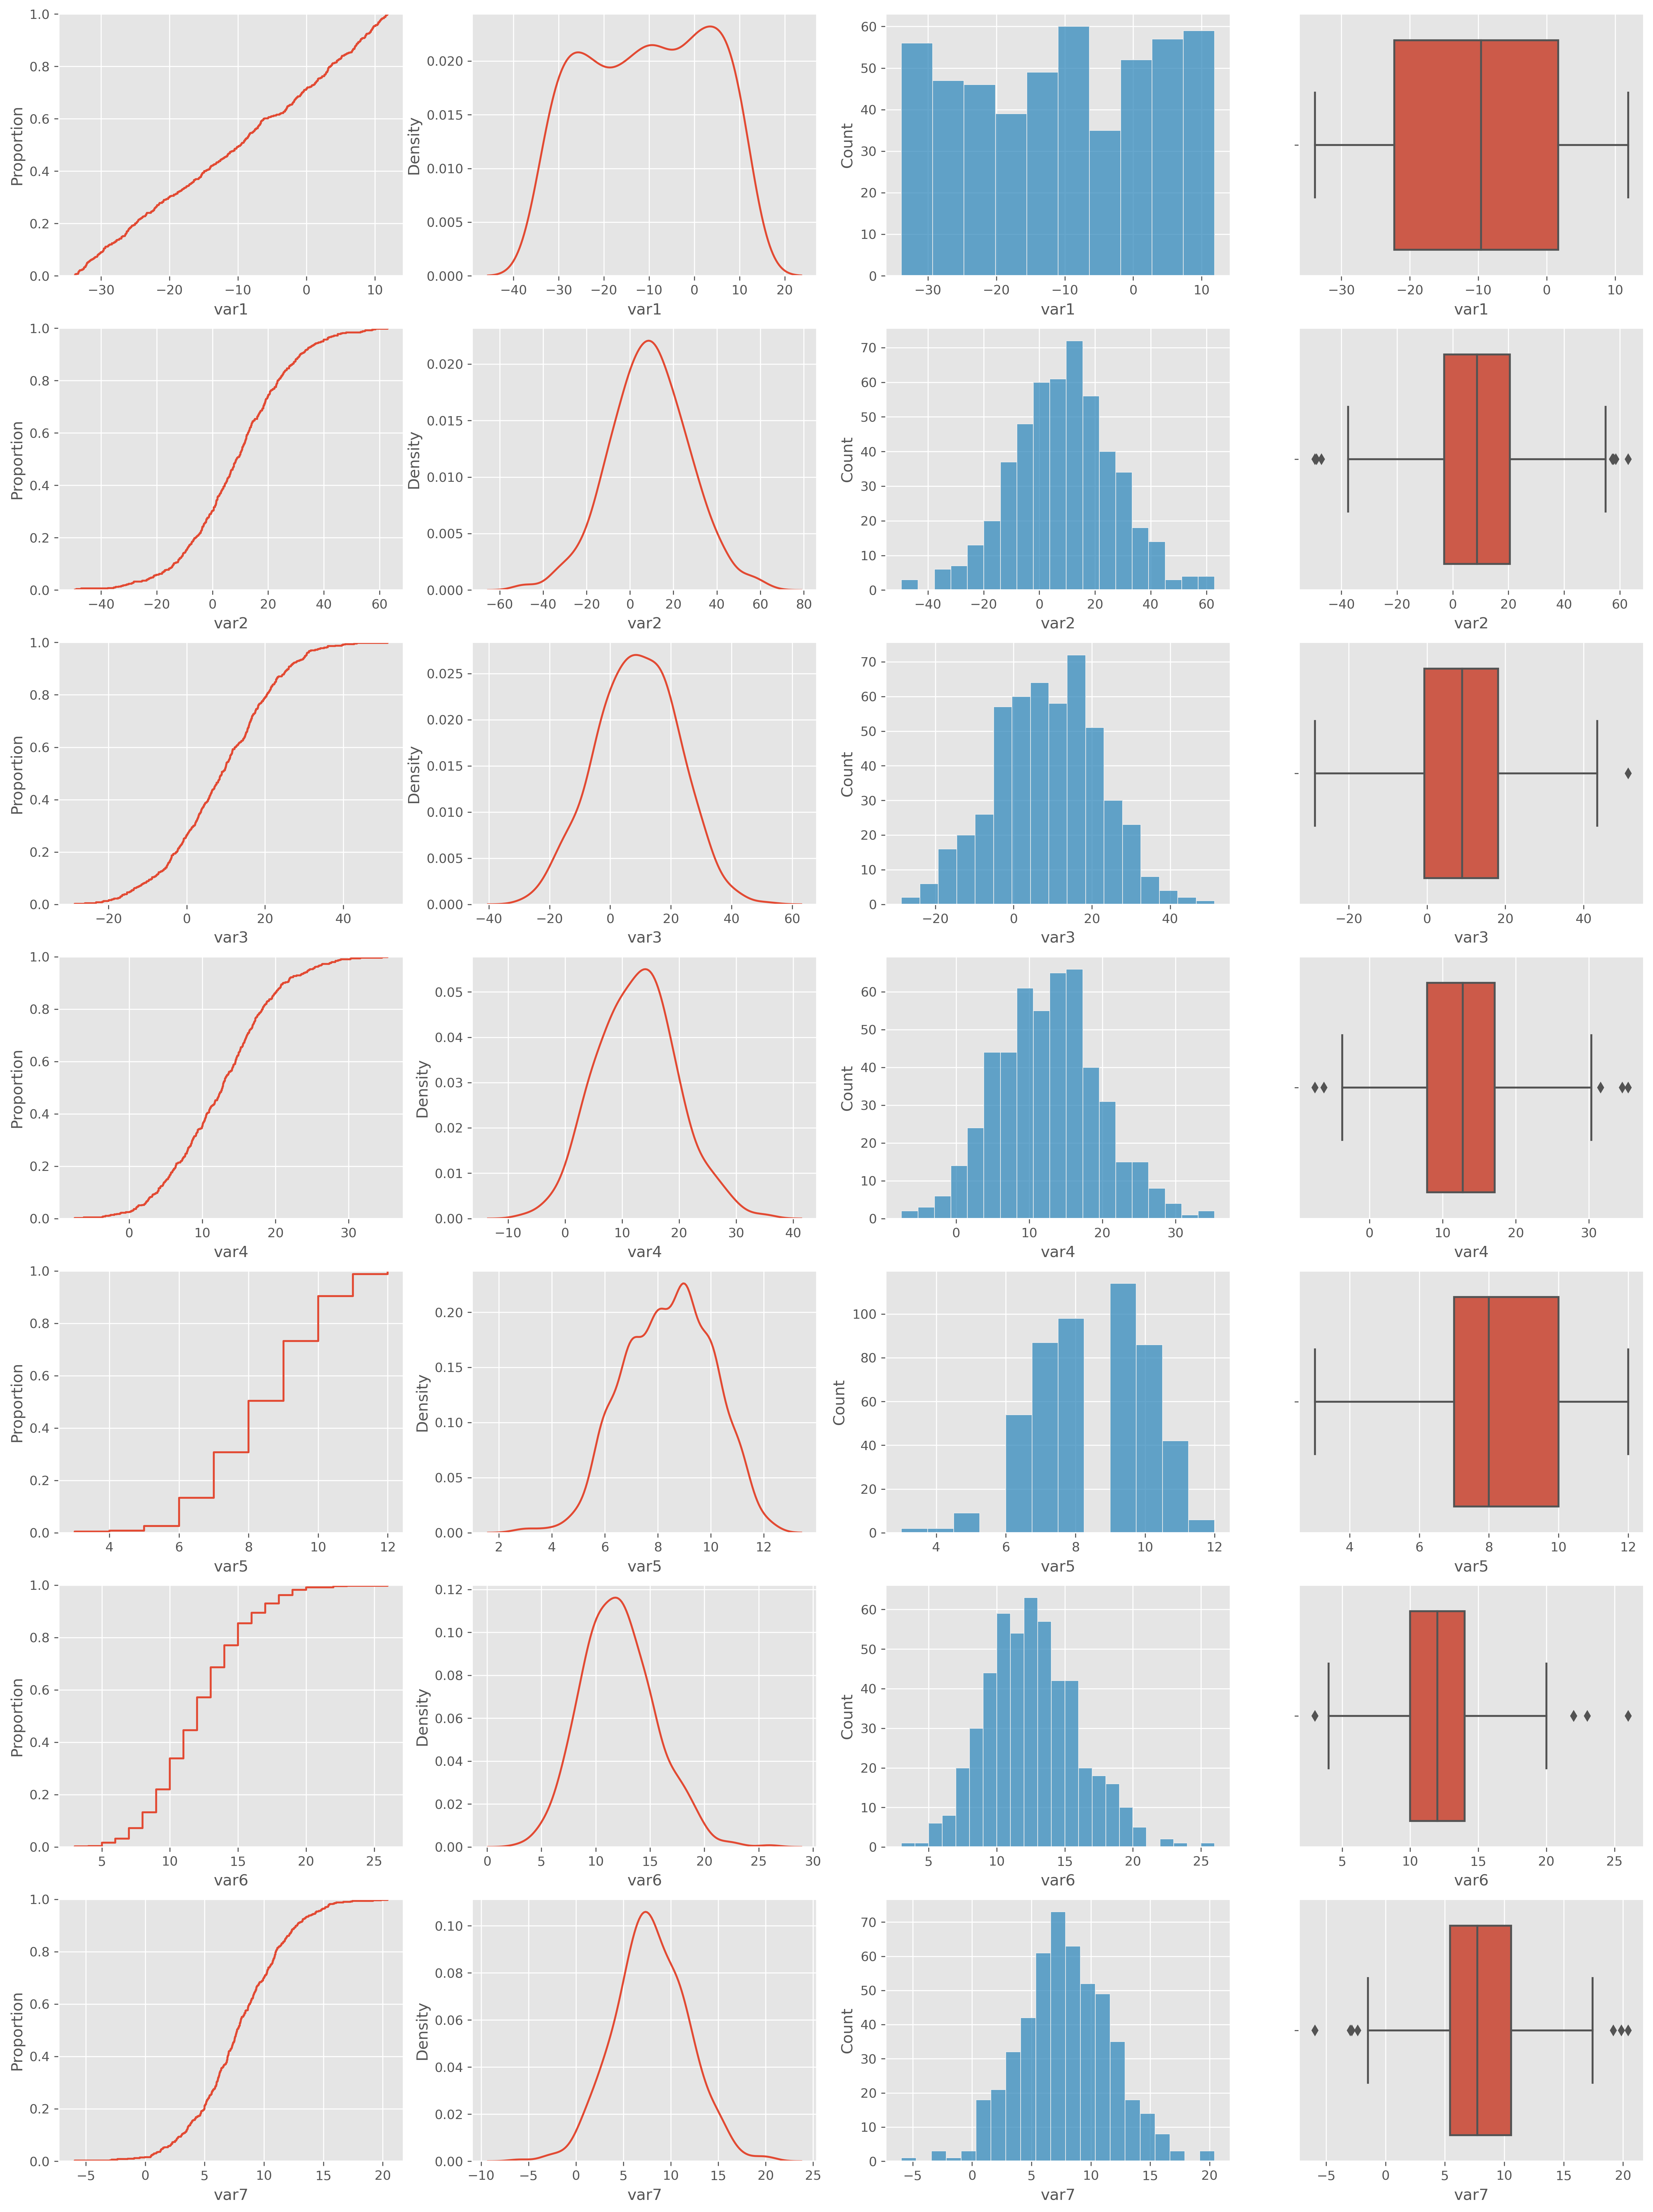

In [7]:
fig, axs = plt.subplots(7, 4, sharex=False,
                            figsize=(22, 30), dpi=300)

for var, ax in zip(names, axs):
    sns.ecdfplot(data=df, x=var, ax=ax[0])
    sns.kdeplot(data=df, x=var, ax=ax[1])
    sns.histplot(data=df, x=var, ax=ax[2])
    sns.boxplot(data=df, x=var, ax=ax[3])

## Предварительное заключение о законе распределения каждой случайной величины.

Случайные величины 2, 3, 4, 7 имеют нормальное распределение, поскольку эксцесс ≈ 0, коэффициент асимметрии ≈ 0, графически имеют вид нормального распределения.

Случайная величина 1 имеет равномерное распределение, поскольку эксцесс ≈ -1.2, коэффициент асимметрии ≈ 0, графически имеют вид равномерного распределения.

Случайная величина 5 имеет дискретное распределение, поскольку эксцесс ≈ 0, коэффициент асимметрии ≈ 0, графически имеют вид равномерного распределения, значения СВ - ограниченный набор дискретных значений.

Случайная величина 6 имеет распределение Пуассона, поскольку эксцесс ≈ 0, коэффициент асимметрии ≈ 0, графически имеют вид равномерного распределения, значения СВ - ограниченный набор дискретных значений, математическое ожидание ≈ дисперсии. 


| Номер выборки|Название|Параметры|
|--------------|:-----:||
|1|равномерное распределение|$a = -33.9$, $b = 11.9$|
|2|нормальное распределение|$\mu = 8.8$, $\sigma = 18.3$|
|3|нормальное распределение|$\mu = 8.8$, $\sigma = 13.4$|
|4|нормальное распределение|$\mu = 12.6$, $\sigma = 7.0$|
|5|дискретное распределение|$p = 0.84$, $n = 10$|
|6|распределение Пуассона|$k = 21$, $\lambda = 12$|
|7|нормальное распределение|$\mu = 7.9$, $\sigma = 3.8$|

# Задание 2. Провести проверку на случайность выбороки.

Используем критерий серий для определения случайности данных.
![series1](ser1.png)
![series](ser2.png)

In [8]:
for name in names:
    all_values = df[name].values
    print(name)
    print('series method |z| < 2.8')
    print('series method', series(all_values))
    print()

var1
series method |z| < 2.8
series method -1.5220520918421698

var2
series method |z| < 2.8
series method -0.9848572358978746

var3
series method |z| < 2.8
series method -1.432519615851454

var4
series method |z| < 2.8
series method 0.9848572358978746

var5
series method |z| < 2.8
series method 1.4782944254798134

var6
series method |z| < 2.8
series method -0.8056200721503368

var7
series method |z| < 2.8
series method -6.983533127275838



Используя критерий серий мы можем отвергунть гипотезу о случайности данных переменной 7. Визуализируем данные, с учётом их последвательности. Легко заметить трендовую составляющую.

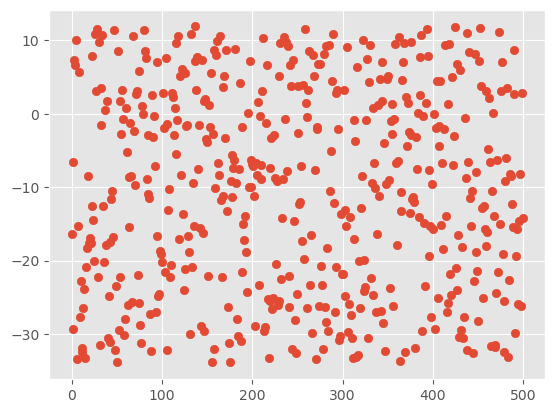

In [18]:
plt.scatter(range(500), df['var1'].values);

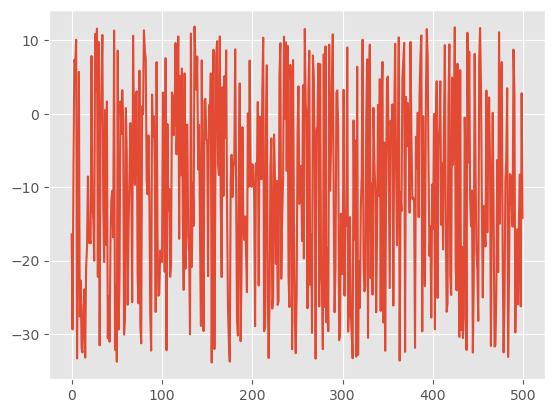

In [19]:
plt.plot(range(500), df['var1'].values);

# Задание 3. Провести проверку на выбросы.

Запишем переменные, которые могут содержать выбросы (основываясь на построенных ранее ящиках с усами)

In [11]:
out_names = ['var2', 'var3', 'var4', 'var6', 'var7']

Используя критерий Граббса
![Grubbs-info](grubbs.png)
и изолированный лес https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf
определим выбросы в данных:

In [12]:
for name in out_names:
    all_values = df[name].values
    non_outliers_grubbs = grubbs.test(all_values, alpha=.05)
    state_forest = IsolationForest(random_state=42, contamination=0.0000000001).fit_predict(
                                                   all_values[..., None].astype(np.float64))
    print(name)
    print('grubbs outlier values: ', list(set(all_values) - set(non_outliers_grubbs)))
    print('isolation forest outlier values: ', all_values[state_forest == -1])
    print()

var2
grubbs outlier values:  []
isolation forest outlier values:  [-49.50451998]

var3
grubbs outlier values:  []
isolation forest outlier values:  [51.36119969]

var4
grubbs outlier values:  []
isolation forest outlier values:  [-7.46151315]

var6
grubbs outlier values:  [26]
isolation forest outlier values:  [26]

var7
grubbs outlier values:  []
isolation forest outlier values:  [-5.94888386]



Для всех переменных использование критерия Граббса является корректным, так как гипотетически они принадлежат нормальному распределению. Для переменной 6 критерий Граббса и изолированный лес определяют значение 26 выбросом.

Удалим выброс из переменной 6. Проведём повторно оценку числовых характеристик и визуализацию данных.

In [13]:
df['var6'].replace(26, np.nan, inplace=True);

In [14]:
get_info(pd.DataFrame(df['var6'])).T

,var6
count,499.000000
nunique,20.000000
mean,12.086172
range,20.000000
std,3.313988
varience,10.982519
min,3.000000
25%,10.000000
50%,12.000000
75%,14.000000


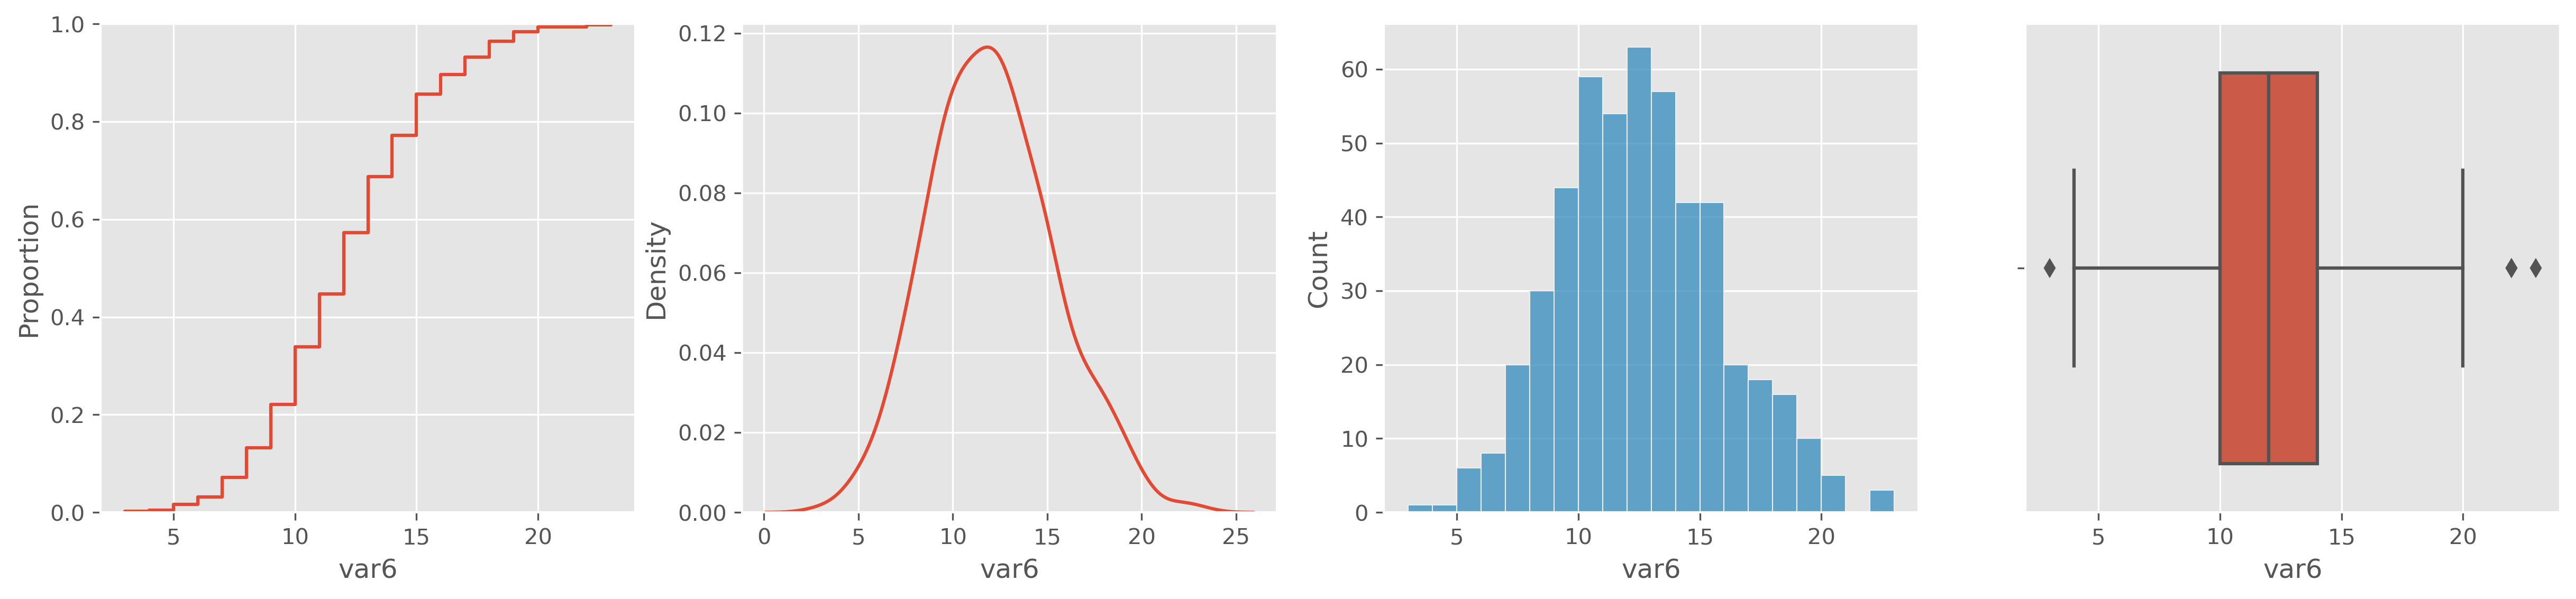

In [15]:
fig, axs = plt.subplots(1, 4, sharex=False, figsize=(20, 4), dpi=300)

sns.ecdfplot(x=df['var6'], ax=axs[0]);
sns.kdeplot(x=df['var6'], ax=axs[1]);
sns.histplot(x=df['var6'], ax=axs[2]);
sns.boxplot(x=df['var6'], ax=axs[3]);

| Номер выборки|Название|Параметры|
|--------------|:-----:||
|6|распределение Пуассона|$k = 20$, $\lambda = 12$|